### Library 

In [244]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

path_main_folder = '/home/antorosi/Documents/AutoEncoder'

sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE_temp
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp, pyplot_latent_space_projection_error
from sklearn.manifold import TSNE

### Load and shape data 

In [157]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [158]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [159]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [160]:
# Change ganularity ?
name_granu = '30m'
data_conso_df = change_granularity(data_conso_df, granularity="30min")

In [161]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Build dataset 

In [162]:
# Split train and test
#date_test_start = datetime.date(2014,1,1)
#date_test_end = datetime.date(2015,1,1)
#dict_xconso = get_train_test_x_conso(x_conso, date_test_start, date_test_end)

dict_xconso = {'train': x_conso}

In [163]:
# Normalize x_conso
type_scaler = 's'
dict_xconso, _ = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = 'standard')

In [164]:
name_type_cond = 'm-wd-temp'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c'
type_x = ['conso']
type_cond = ['month', 'weekday', 'temperature']

In [165]:
dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)

In [166]:
# modify dataset to fit with new data format
cond_pre = dataset['train']['x'][1][:,:14]
to_emb = dataset['train']['x'][1][:,14:]
x = dataset['train']['x'][0]

dataset['train']['x'] = [x, cond_pre, to_emb]

In [167]:
dataset['train']['x'][2].shape

(1830, 48)

### Build model

In [168]:
path_out = os.path.join(path_main_folder, 'out')

In [321]:
# Parameters
e_dims=[48,24,12]
d_dims=[12,24,48]
emb_dims=[4]
cond_pre_dim = dataset['train']['x'][1].shape[1]
input_dim = dataset['train']['x'][0].shape[1]
to_emb_dim = dataset['train']['x'][2].shape[1]
z_dim= 4
beta = 0.005

In [322]:
name_model = 'thesis_e48-24-12_d12-24-48_gran-{}_x-{}_cond-{}'.format(name_granu,name_type_x, name_type_cond)
#name_model = 'cvae_classification_z4_b0.05'

In [323]:
name_model

'thesis_e48-24-12_d12-24-48_gran-30m_x-c_cond-m-wd-temp'

In [324]:
model = CVAE_temp(input_dim=input_dim,
                  to_emb_dim=to_emb_dim,
                  cond_pre_dim=cond_pre_dim, 
                  e_dims=e_dims, 
                  d_dims=d_dims, 
                  emb_dims=emb_dims,
                  z_dim=z_dim, 
                  beta=beta,
                  name=name_model, 
                  output=path_out)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
to_emb (InputLayer)             (None, 48)           0                                            
__________________________________________________________________________________________________
cond_pre (InputLayer)           (None, 14)           0                                            
__________________________________________________________________________________________________
embedding (Model)               (None, 4)            196         to_emb[0][0]                     
__________________________________________________________________________________________________
x_true (InputLayer)             (None, 48)           0                                            
____________________________________________________________________________________________

### Trainning model 



--- START TRAINING ---

Epoch 1/150
1830/1830 [==============================] - 1s 504us/step - loss: 16.7643 - kl_loss: 15.9067 - recon_loss: 16.6848
Epoch 2/150
1830/1830 [==============================] - 0s 80us/step - loss: 1.8515 - kl_loss: 28.8074 - recon_loss: 1.7075
Epoch 3/150
1830/1830 [==============================] - 0s 79us/step - loss: 1.2191 - kl_loss: 29.1067 - recon_loss: 1.0736
Epoch 4/150
1830/1830 [==============================] - 0s 76us/step - loss: 1.0202 - kl_loss: 27.8601 - recon_loss: 0.8809
Epoch 5/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.9141 - kl_loss: 25.9235 - recon_loss: 0.7845
Epoch 6/150
1830/1830 [==============================] - 0s 74us/step - loss: 0.8580 - kl_loss: 24.4706 - recon_loss: 0.7356
Epoch 7/150
1830/1830 [==============================] - 0s 76us/step - loss: 0.8128 - kl_loss: 23.1126 - recon_loss: 0.6972
Epoch 8/150
1830/1830 [==============================] - 0s 77us/step - loss: 0.7683 - kl_loss: 

1830/1830 [==============================] - 0s 76us/step - loss: 0.2639 - kl_loss: 12.8455 - recon_loss: 0.1997
Epoch 66/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.2593 - kl_loss: 12.6855 - recon_loss: 0.1959
Epoch 67/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.2630 - kl_loss: 12.6770 - recon_loss: 0.1996
Epoch 68/150
1830/1830 [==============================] - 0s 75us/step - loss: 0.2465 - kl_loss: 12.6300 - recon_loss: 0.1833
Epoch 69/150
1830/1830 [==============================] - 0s 76us/step - loss: 0.2598 - kl_loss: 12.6346 - recon_loss: 0.1966
Epoch 70/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.2464 - kl_loss: 12.6133 - recon_loss: 0.1834
Epoch 71/150
1830/1830 [==============================] - 0s 79us/step - loss: 0.2551 - kl_loss: 12.7148 - recon_loss: 0.1915
Epoch 72/150
1830/1830 [==============================] - 0s 80us/step - loss: 0.2487 - kl_loss: 12.7697 - recon_loss: 0.1848
Epoch

1830/1830 [==============================] - 0s 76us/step - loss: 0.1972 - kl_loss: 11.6576 - recon_loss: 0.1389
Epoch 130/150
1830/1830 [==============================] - 0s 79us/step - loss: 0.2036 - kl_loss: 11.7406 - recon_loss: 0.1449
Epoch 131/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.2029 - kl_loss: 11.7291 - recon_loss: 0.1442
Epoch 132/150
1830/1830 [==============================] - 0s 77us/step - loss: 0.2091 - kl_loss: 11.8316 - recon_loss: 0.1499
Epoch 133/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.1973 - kl_loss: 11.6129 - recon_loss: 0.1393
Epoch 134/150
1830/1830 [==============================] - 0s 76us/step - loss: 0.1964 - kl_loss: 11.5616 - recon_loss: 0.1386
Epoch 135/150
1830/1830 [==============================] - 0s 81us/step - loss: 0.2003 - kl_loss: 11.5732 - recon_loss: 0.1425
Epoch 136/150
1830/1830 [==============================] - 0s 78us/step - loss: 0.1966 - kl_loss: 11.6250 - recon_loss: 0.138

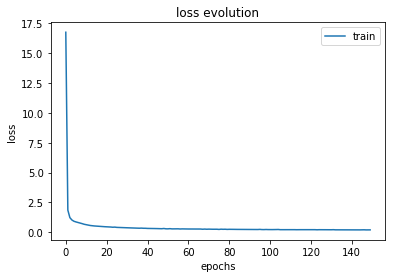

In [325]:
model.main_train(dataset, training_epochs=150, batch_size=20, verbose=False)

In [251]:
with open(os.path.join(path_out,name_model,"config.txt"),'w') as file: 
    file.write(str(cond_pre_dim) + '\n')
    file.write(str(emb_dims) + '\n')
    file.write(str(e_dims) + '\n') 
    file.write(str(d_dims) + '\n') 
    file.write(str(z_dim) + '\n')
    file.write(str(beta) + '\n')

## Loading model 

In [252]:
#model.load_model(os.path.join(path_out, name_model, 'models'))

### Analysis of the latent space

In [326]:
name_set_plot = 'train'
version = '-v0'

In [327]:
dataset['train']['x'][2].shape

(1830, 48)

In [328]:
temp_emb = model.embedding.predict(dataset['train']['x'][2])
cond_pre = dataset['train']['x'][1]
cond = np.concatenate((cond_pre, temp_emb), axis=1)

x_input = dataset['train']['x'][0]

input_encoder = [x_input, cond]

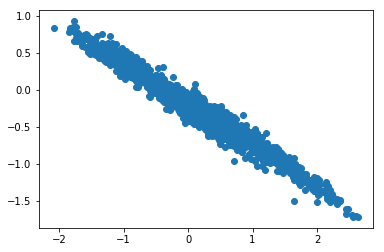

In [329]:
plt.scatter(temp_emb[:,0], temp_emb[:,1])

In [330]:
x_encoded = model.encoder.predict(input_encoder)[0]

In [331]:
x_encoded.var(axis=0)

array([0.51107526, 2.5985324 , 0.7440402 , 0.551829  ], dtype=float32)

In [259]:
# t-sne if latent space more than 2 dimension
x_encoded = TSNE(n_components=2).fit_transform(x_encoded)

In [260]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

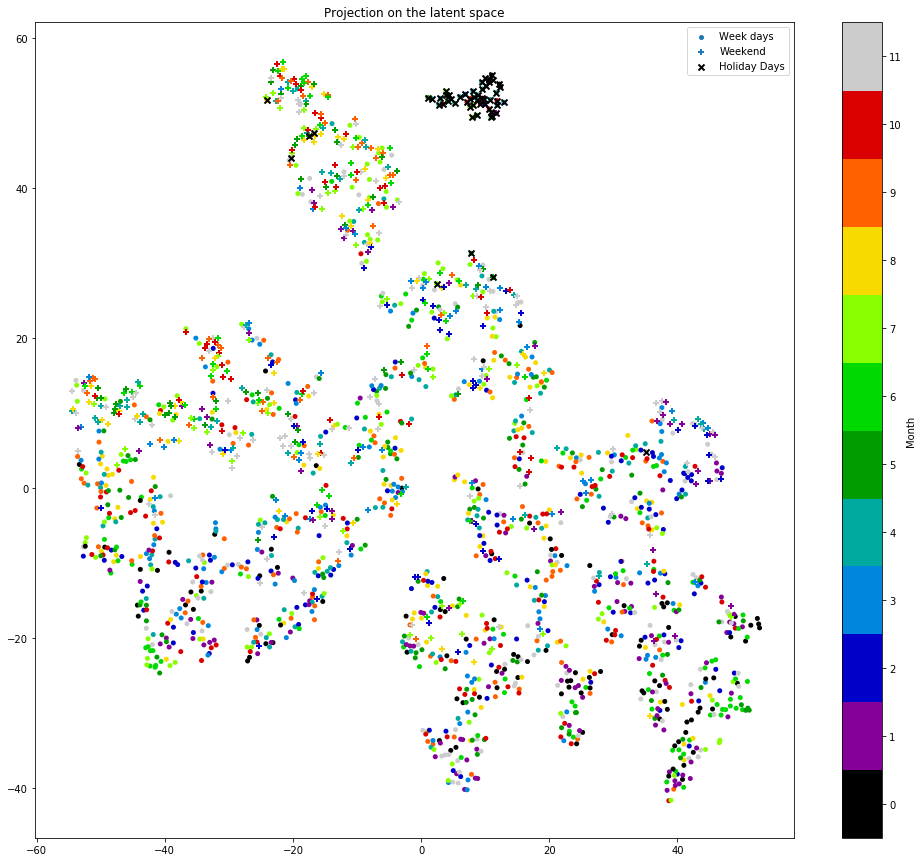

In [261]:
#name_plot = 'emb{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}-TSNE'.format(str(emb_dims[-1]),str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
name_plot = 'emb{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}-TSNE'.format(str(emb_dims[-1]),str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
plot_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=os.path.join(path_out,name_model,'results'), name=name_plot, 
                             pyplot=True, plotly = False)

In [262]:
temp = get_cond_autoencoder(dataset['train']['x'],dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

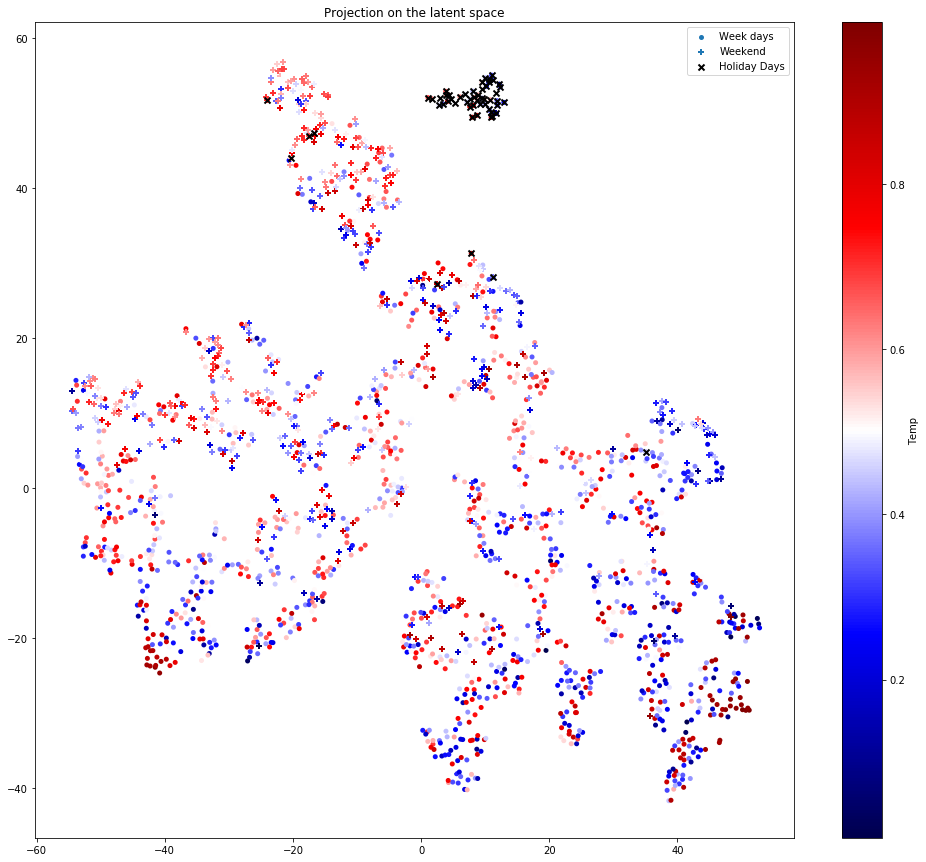

In [263]:
#name_plot = 'emb{}_temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}_TSNE'.format(str(emb_dims[-1]),str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
name_plot = 'emb{}_temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(emb_dims[-1]),str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

In [59]:
path_model_folder = os.path.join(path_main_folder, 'out',name_model)
name_dataset = 'dataset.pickle'

with open(os.path.join(path_model_folder, 'dataset.pickle'), 'wb') as f:
    pickle.dump(dataset,f)

# Analyse of the reconstruction error

In [834]:
x_hat = model.cvae.predict(x=dataset['train']['x'])

In [835]:
res_mat = (x - x_hat)
res = res_mat.mean(axis=1)

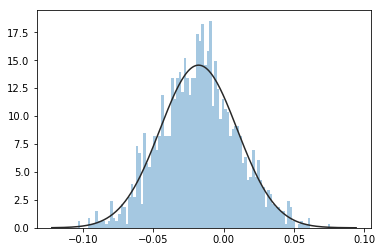

In [629]:
sn.distplot(res, kde=False, fit=stats.norm, bins=100)

In [836]:
res_conso_mat = res_mat[:,:48]
res_temp_mat = res_mat[:,48:]

In [837]:
res_conso = res_conso_mat.mean(axis=1)
res_temp = res_temp_mat.mean(axis=1)

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

Mean of empty slice.

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning:

invalid value encountered in true_divide



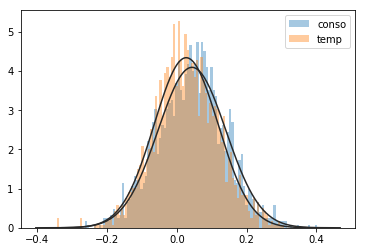

In [174]:
sn.distplot(res_conso, kde=False, fit=stats.norm, bins=100, label='conso')
sn.distplot(res_temp, kde=False, fit=stats.norm, bins=100, label='temp')
plt.legend()

In [838]:
results = dict()
results['me'] = {'all': res, 'temp': res_temp, 'conso': res_conso}

In [839]:
results['mae'] = {
    'all': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_mat),
    'conso': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_conso_mat),
    'temp': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_temp_mat)
}

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

Mean of empty slice.

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [840]:
results['z_score'] = {}
results['a_score'] = {}

for key, me in results['me'].items():
    z_score = stats.zscore(me)
    a_score = 1-2 * stats.norm.cdf(-np.abs(z_score))
    
    results['z_score'][key] = z_score
    results['a_score'][key] = a_score

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

/local/home/antorosi/PycharmProjects/KERAS-TS-VENV/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning:

invalid value encountered in greater_equal



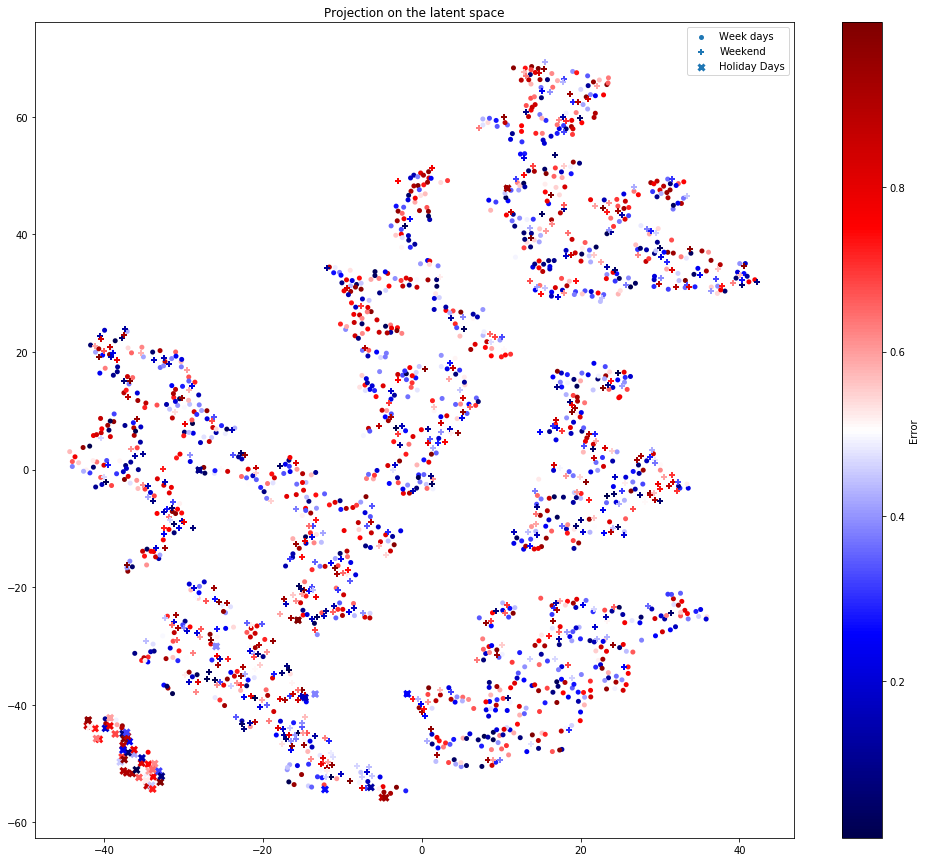

In [841]:
type_error = 'a_score'
type_data = 'all'

name_plot = 'emb{}_{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(emb_dims[-1]),type_error,str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)

path_plot = os.path.join(path_out,name_model,'results')

error = results[type_error][type_data]
pyplot_latent_space_projection_error(x_encoded, calendar_info, error, color='seismic', path_folder_out=path_plot, name=name_plot)

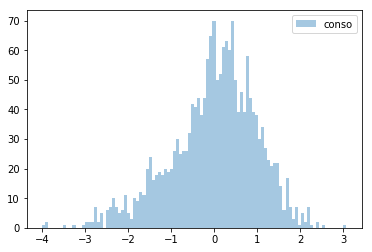

In [91]:
sn.distplot(results['z_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

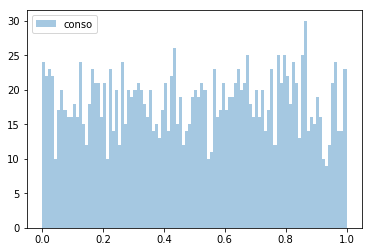

In [146]:
sn.distplot(results['a_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

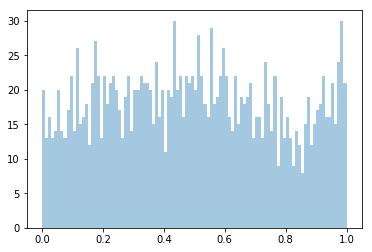

In [228]:
sn.distplot(stats.norm.cdf(results['z_score']['conso']), kde=False, bins=100, label='conso')

In [194]:
indice = 200

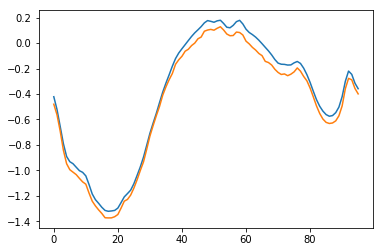

In [195]:
plt.plot(x[indice,])
plt.plot(x_hat[indice,])

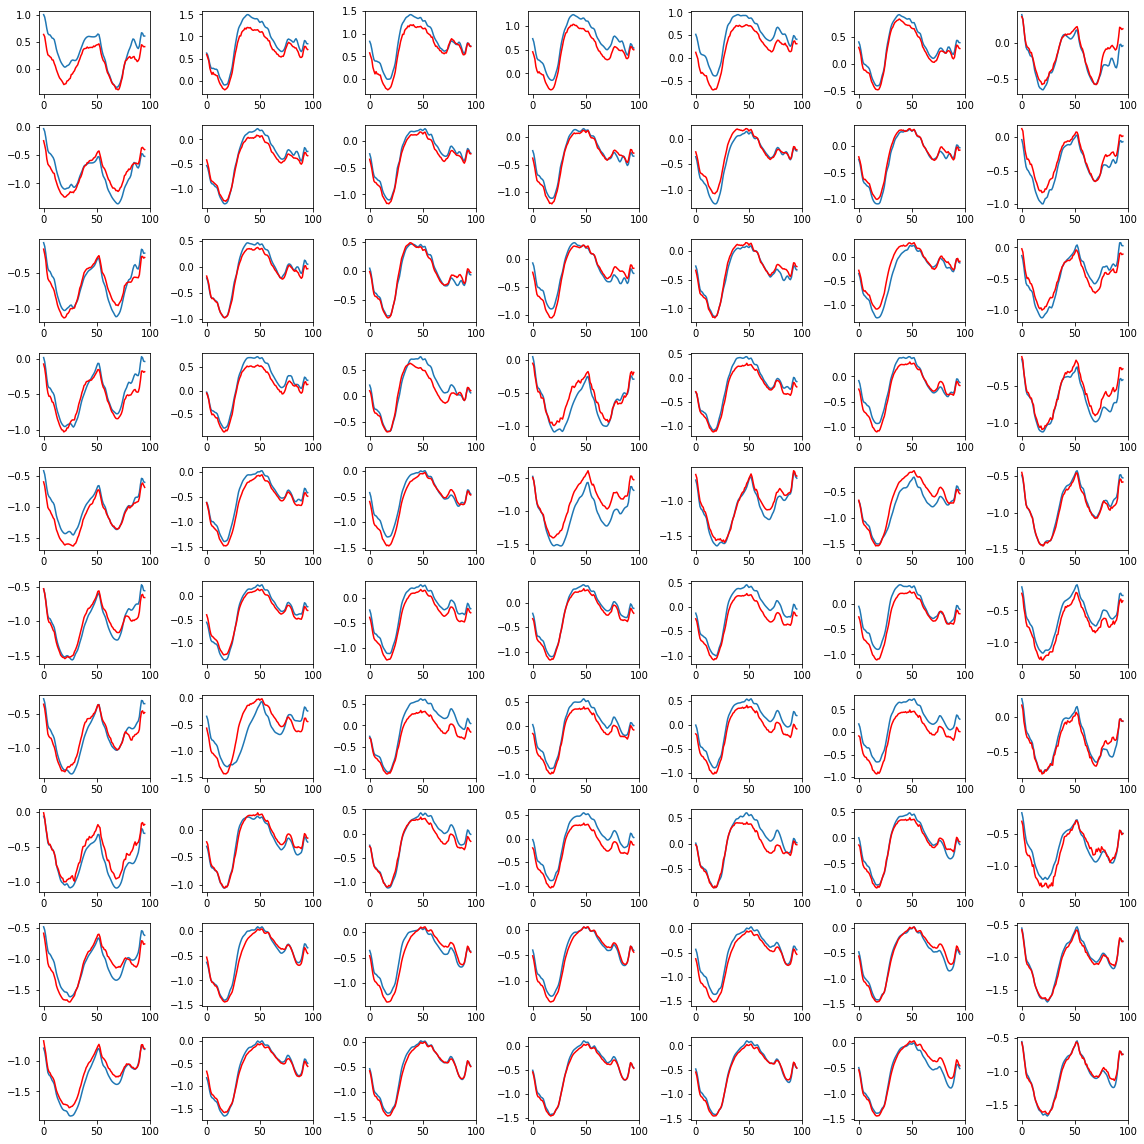

In [193]:
fig, axes = plt.subplots(10,7, figsize=(16,16))

ind = 100

for ax_row in axes:
    for ax in ax_row:
        # create a twin of the axis that shares the x-axis
        # plot some data on each axis.
        ax.plot(x[ind,:])
        ax.plot(x_hat[ind,:],'-r')
        
        ind+=1

plt.tight_layout()
plt.show()

# Function 


In [282]:
def pyplot_simple_latent_space_projection(x_proj, calendar_info, path_folder_out, name=None, size_fig=(10,8)):
    """

    :param x_proj:
    :param calendar_info:
    :param path_folder_out:
    :param name:
    :return:
    """

    #Different possible colormap: nipy_spectral, plasma, viridis

    month = np.array(calendar_info.month)

    mask_isweekday = False
    mask_ishd = False

    fig, ax = plt.subplots(figsize=size_fig)
    #circle = plt.Circle((0, 0), 1.96, fill=0) 
    #ax.add_artist(circle)
    #ax.tick_params(axis='both', labelsize=16)

    
    if 'is_weekday' in calendar_info.columns:
        mask_isweekday = calendar_info.is_weekday.astype('bool')
        
        plt.scatter(x_proj[mask_isweekday, 0], x_proj[mask_isweekday, 1], marker='.', lw=2,
                c=month[mask_isweekday], cmap=plt.cm.get_cmap('nipy_spectral', 12), label='Week days')
        plt.scatter(x_proj[np.invert(mask_isweekday), 0], x_proj[np.invert(mask_isweekday), 1], marker='+', lw=2,
                c=month[np.invert(mask_isweekday)], cmap=plt.cm.get_cmap('nipy_spectral', 12), label='Weekend')
        print('week_day')
        
    else:
        plt.scatter(x_proj[:, 0], x_proj[:, 1], marker='.', lw=2,
                c=month, cmap=plt.cm.get_cmap('nipy_spectral', 12))
        print('normal')


    if 'is_hd' in calendar_info.columns:
        mask_ishd = calendar_info.is_hd.astype('bool')
        plt.scatter(x_proj[mask_ishd, 0], x_proj[mask_ishd, 1], marker='x', lw=2,
                c='black', label='Holiday Days')

   
    
    cbar = plt.colorbar(ticks=range(0, 12), label='Month')
    cbar.ax.tick_params(labelsize=16) 
    cbar.ax.yaxis.label.set_fontsize(18)
    
    
    plt.clim(-0.5, 11.5)
    plt.axis('equal')

    plt.legend()

    if name is None:
        name = 'latent_space_proj'

    if path_folder_out is not None:
        plt.savefig(os.path.join(path_folder_out, name + '.png'))
        plt.savefig(os.path.join(path_folder_out, name + '.pdf'))
        

    plt.show()

In [296]:
def pyplot_week_latent_space_projection(x_proj, calendar_info, path_folder_out, name=None, size_fig=(12,10)):
    """

    :param x_proj:
    :param calendar_info:
    :param path_folder_out:
    :param name:
    :return:
    """

    #Different possible colormap: nipy_spectral, plasma, viridis


    mask_isweekday = False
    mask_ishd = False

    fig, ax = plt.subplots(figsize=size_fig)
    circle = plt.Circle((0, 0), 1.96, fill=0) 
    ax.add_artist(circle)
    
    if 'is_weekday' in calendar_info.columns:
        mask_isweekday = calendar_info.is_weekday.astype('bool')
        
        plt.scatter(x_proj[mask_isweekday, 0], x_proj[mask_isweekday, 1], marker='.', lw=2,
                c="C2", label='Week days')
        plt.scatter(x_proj[np.invert(mask_isweekday), 0], x_proj[np.invert(mask_isweekday), 1], marker='+', lw=2,
                c="C3",label='Weekend')
        print('week_day')
        
    else:
        plt.scatter(x_proj[:, 0], x_proj[:, 1], marker='.', lw=2,
                c=month, cmap=plt.cm.get_cmap('nipy_spectral', 12))
        print('normal')


    if 'is_hd' in calendar_info.columns:
        mask_ishd = calendar_info.is_hd.astype('bool')
        plt.scatter(x_proj[mask_ishd, 0], x_proj[mask_ishd, 1], marker='s', lw=2,
                c='black', label='Holiday Days')
   
    plt.axis('equal')

    plt.legend(fontsize = 'large')

    if name is None:
        name = 'latent_space_proj'

    if path_folder_out is not None:
        plt.savefig(os.path.join(path_folder_out, name + '.png'))
        plt.savefig(os.path.join(path_folder_out, name + '.pdf'))
        

    plt.show()

In [302]:
def pyplot_latent_space_projection_temp(x_proj, calendar_info, temp, path_folder_out=None, name=None,size_fig=(10,8)):
    """

    :param x_proj:
    :param calendar_info:
    :param path_folder_out:
    :param name:
    :return:
    """

    #Different possible colormap: seismic

    mask_isweekday = False
    mask_ishd = False
    
    fig, ax = plt.subplots(figsize=size_fig)
    #circle = plt.Circle((0, 0), 1.96, fill=0) 
    #ax.add_artist(circle)
    #ax.add_artist(circle)
    ax.tick_params(axis='both', labelsize=16)

 
    
    if 'is_weekday' in calendar_info.columns:
        mask_isweekday = calendar_info.is_weekday.astype('bool')
        plt.scatter(x_proj[mask_isweekday, 0], x_proj[mask_isweekday, 1], marker='.', lw=2,
                c=temp[mask_isweekday], cmap=plt.cm.get_cmap('seismic'), label='Week days')
        plt.scatter(x_proj[np.invert(mask_isweekday), 0], x_proj[np.invert(mask_isweekday), 1], marker='+', lw=2,
                c=temp[np.invert(mask_isweekday)], cmap=plt.cm.get_cmap('seismic'), label='Weekend')
    else:
        plt.scatter(x_proj[:, 0], x_proj[:, 1], marker='.', lw=2,
                c=temp, cmap=plt.cm.get_cmap('seismic'))
        

    cbar=plt.colorbar(label='Temperature')
    #plt.clim(-0.5, 11.5)
    plt.axis('equal')
    cbar.ax.tick_params(labelsize=16) 
    cbar.ax.yaxis.label.set_fontsize(18)
    
        
    if 'is_hd' in calendar_info.columns:
        mask_ishd = calendar_info.is_hd.astype('bool')
        plt.scatter(x_proj[mask_ishd, 0], x_proj[mask_ishd, 1], marker='x', lw=2,
                c='black', label='Holiday Days')

    plt.legend()

    if name is None:
        name = 'latent_space_proj'

    if path_folder_out is not None:
        plt.savefig(os.path.join(path_folder_out, name + '.png'))
        plt.savefig(os.path.join(path_folder_out, name + '.pdf'))
        

    plt.show()


In [289]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
#calendar_info['weekday'] = calendar_info.ds.dt.weekday
#calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

In [290]:
name_plot = 'z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
path_folder_out = os.path.join(path_out,name_model,'results')

In [291]:
name_plot = 'month_z4_CVAE_TSNE'.format(beta)
#path_folder_out = 

normal


TypeError: You must first set_array for mappable

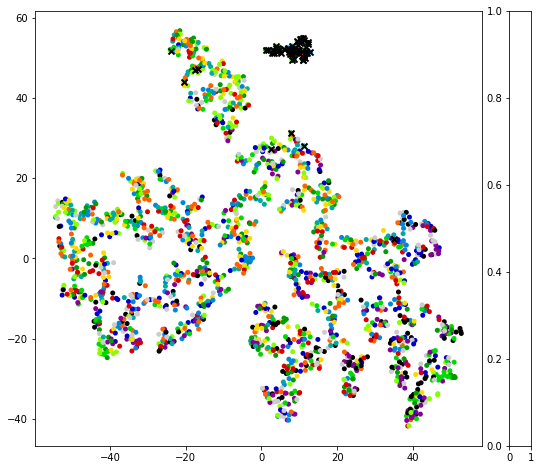

In [292]:
pyplot_simple_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=path_folder_out, name=name_plot)

In [293]:
temp = get_cond_autoencoder(dataset['train']['x'],dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

In [303]:
name_plot = 'temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
name_plot = "temp_hd_z4_cvae_TSNE"                                                                    

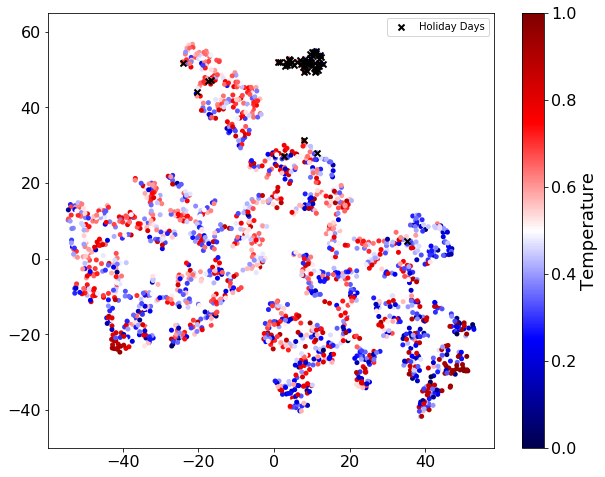

In [304]:
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

# PCA

In [313]:
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import scale

In [332]:
x = x_encoded

In [333]:
pca = decomposition.PCA()

In [334]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [335]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

In [336]:
var

array([ 66.      ,  80.9     ,  92.100006, 100.00001 ], dtype=float32)

In [384]:
var = np.array([55,79,91,100])

In [385]:
x = np.array([1,2,3,4])

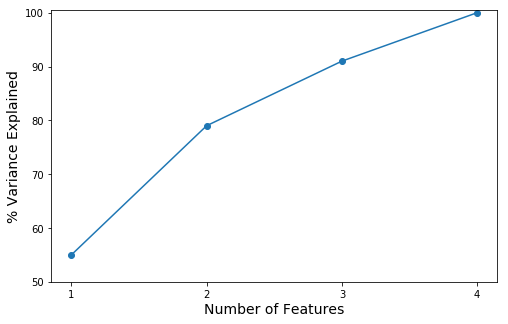

In [389]:
fig = plt.figure(figsize=(8,5))


plt.ylabel('% Variance Explained', size=14)
plt.xlabel('Number of Features',size=14)
plt.ylim(50,100.5)
plt.xticks(np.arange(0, 4+1, 1.0))#plt.style.context('seaborn-whitegrid')

plt.plot(x,var ,'-o')

h_save = os.path.join(path_thesis_figures)
name_fig = 'PCA_CVAE_z4'
plt.savefig(os.path.join(path_thesis_figures, name_fig + '.png'))
plt.savefig(os.path.join(path_thesis_figures, name_fig + '.pdf'))

In [387]:

pat

NameError: name 'path_thesis_figures' is not defined

In [388]:
path_thesis_figures = '/home/antorosi/Documents/Thesis/Figures'
